In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Importing the Data Set
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#bank.info()

# Exploring the Data and Preprocessing

In [4]:
print("Length of the dataset: ",len(bank))

Length of the dataset:  41188


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#checking for missing values
#bank.isnull().any()

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
grouped_data = bank.groupby(['y'])
grouped_data['age','duration','euribor3m','campaign'].describe().unstack()

                  y  
age        count  no     36548.000000
                  yes     4640.000000
           mean   no        39.911185
                  yes       40.913147
           std    no         9.898132
                  yes       13.837476
           min    no        17.000000
                  yes       17.000000
           25%    no        32.000000
                  yes       31.000000
           50%    no        38.000000
                  yes       37.000000
           75%    no        47.000000
                  yes       50.000000
           max    no        95.000000
                  yes       98.000000
duration   count  no     36548.000000
                  yes     4640.000000
           mean   no       220.844807
                  yes      553.191164
           std    no       207.096293
                  yes      401.171871
           min    no         0.000000
                  yes       37.000000
           25%    no        95.000000
                  yes      2

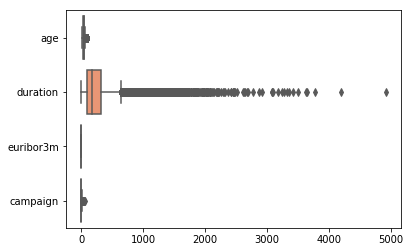

In [9]:
import seaborn as sns
bank_num = bank[['age','duration','euribor3m','campaign']]
ax = sns.boxplot(data=bank_num, orient="h", palette="Set2")

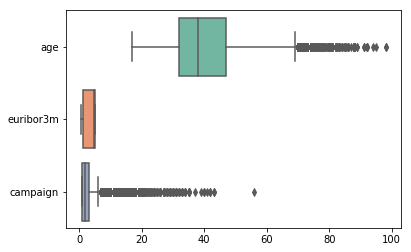

In [10]:
ax = sns.boxplot(data=bank[['age','euribor3m','campaign']], orient="h", palette="Set2")

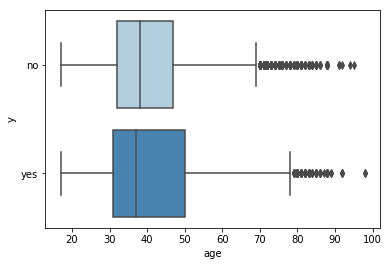

In [11]:
import seaborn as sns
df=bank
sns.boxplot( x=df["age"], y=df["y"], palette="Blues")

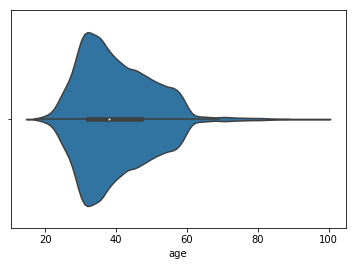

In [12]:
ax = sns.violinplot(x="age", data=bank)

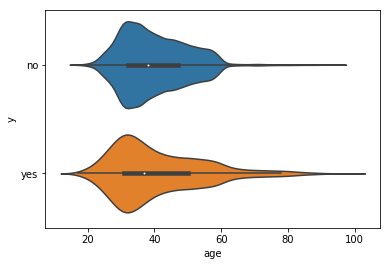

In [13]:
ax = sns.violinplot(x="age", y="y", data=bank)

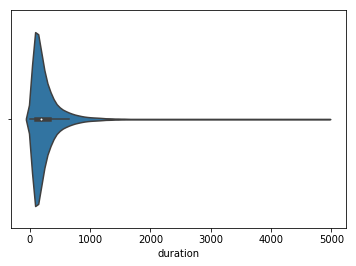

In [14]:
ax = sns.violinplot(x="duration", data=bank)
#'age','duration','euribor3m','campaign'

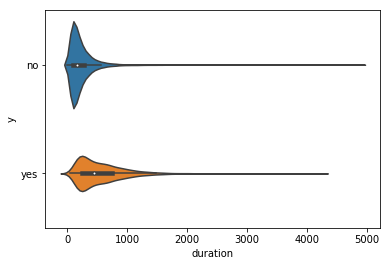

In [15]:
ax = sns.violinplot(x="duration", y="y", data=bank)
#'age','duration','euribor3m','campaign'

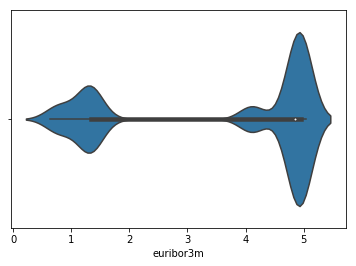

In [16]:
ax = sns.violinplot(x="euribor3m", data=bank)
#'age','duration','euribor3m','campaign'

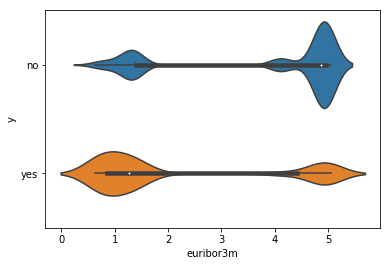

In [17]:
ax = sns.violinplot(x="euribor3m", y="y", data=bank)
#'age','duration','euribor3m','campaign'

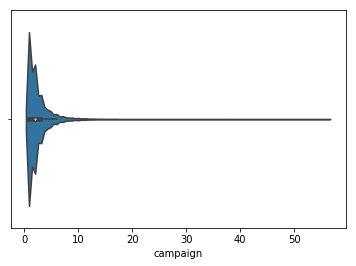

In [18]:
ax = sns.violinplot(x="campaign", data=bank)
#'age','duration','euribor3m','campaign'

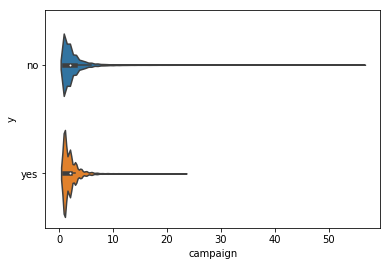

In [19]:
ax = sns.violinplot(x="campaign", y="y", data=bank)
#'age','duration','euribor3m','campaign'

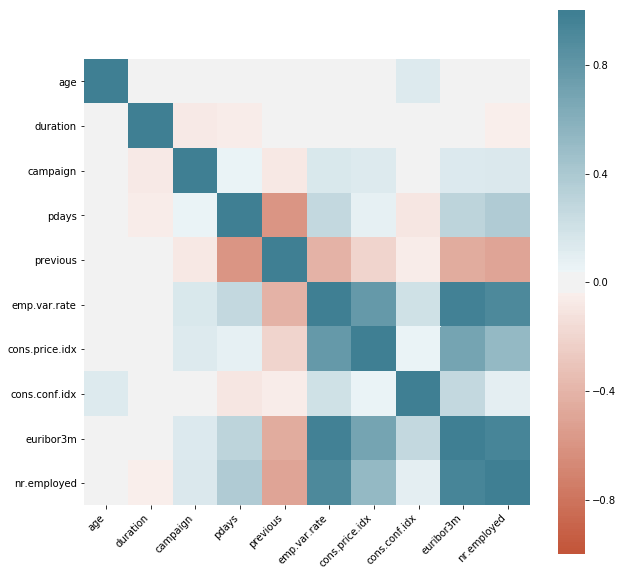

In [20]:
#correlation
corr = bank.corr()
ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
#Converting y to a dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
# Exploring the categorical variables

print('Jobs: ', bank['job'].unique())
print("\n")
print('Marital: ', bank['marital'].unique())
print("\n")
print('Education: ', bank['education'].unique())
print("\n")
print('Default: ', bank['default'].unique())
print("\n")
print('Housing: ', bank['housing'].unique())
print("\n")
print('loan: ', bank['loan'].unique())
print("\n")
print('Contact: ', bank['contact'].unique())
print("\n")
print('month: ', bank['month'].unique())
print("\n")
print('poutcome: ', bank['poutcome'].unique())

Jobs:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Marital:  ['married' 'single' 'divorced' 'unknown']


Education:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Default:  ['no' 'unknown' 'yes']


Housing:  ['no' 'yes' 'unknown']


loan:  ['no' 'yes' 'unknown']


Contact:  ['telephone' 'cellular']


month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


poutcome:  ['nonexistent' 'failure' 'success']


In [23]:
# Categorical Data Preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['job']      = labelencoder_X.fit_transform(bank['job']) 
bank['marital']  = labelencoder_X.fit_transform(bank['marital']) 
bank['education']= labelencoder_X.fit_transform(bank['education']) 
bank['default']  = labelencoder_X.fit_transform(bank['default']) 
bank['housing']  = labelencoder_X.fit_transform(bank['housing']) 
bank['loan']     = labelencoder_X.fit_transform(bank['loan']) 
bank['contact']     = labelencoder_X.fit_transform(bank['contact']) 
bank['month']     = labelencoder_X.fit_transform(bank['month']) 
bank['day_of_week']     = labelencoder_X.fit_transform(bank['day_of_week']) 
bank['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [24]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
bank.shape

(41188, 21)

In [26]:
#creating Age Groups

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
5,2,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
7,2,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
# Creating duration Groups

def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank);
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
5,2,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
7,2,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
5,2,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
7,2,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
8,1,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
# data set Split
from sklearn.model_selection import train_test_split
bank_x = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

#Removed- duration

#Converting y to a dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
#bank.head()

X_train, X_test, y_train, y_test = train_test_split(bank_x, y, test_size = 0.2, random_state = 123)

In [30]:
# Creating Cross validation sets

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [31]:
#X_train.info()

In [32]:
#X_test.info()

In [33]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
5402,2,2,1,3,0,0,0,1,6,0,1.1,93.994,-36.4,4.857,5191.0,2,999,0,1
40128,1,7,2,5,0,0,0,0,3,3,-1.7,94.215,-40.3,0.835,4991.6,3,999,1,2
11388,2,1,1,7,0,2,0,1,4,0,1.4,94.465,-41.8,4.959,5228.1,5,999,0,1
16361,1,1,2,2,1,2,0,0,3,4,1.4,93.918,-42.7,4.963,5228.1,2,999,0,1
23389,2,9,1,6,0,0,0,0,1,4,1.4,93.444,-36.1,4.964,5228.1,4,999,0,1


# Model Building and Selection

In [34]:
# Logistic Regression

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() 
log.fit(X_train,y_train)
logpred = log.predict(X_test)

Training_score_log = log.score(X_train,y_train)
Accuracy_log = accuracy_score(y_test, logpred)
Precision_log = precision_score(y_test, logpred)
Recall_log = recall_score(y_test, logpred)
log_CV = (cross_val_score(log, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, logpred))
print("Training_score:", Training_score_log)
print("Accuracy:", Accuracy_log)
print("Precision:", Precision_log)
print("Recall:", Recall_log)
print("Cross Validation Score:", log_CV)


[[7215   83]
 [ 736  204]]
Training_score: 0.9001820940819424
Accuracy: 0.9005826656955572
Precision: 0.710801393728223
Recall: 0.2170212765957447
Cross Validation Score: 0.8992109256449167


1 0.846464339908953
2 0.8885887708649468
3 0.8814567526555386
4 0.8899848254931715
5 0.8903490136570562
6 0.8938694992412746
7 0.8937177541729893
8 0.895690440060698
9 0.8947192716236723
10 0.89608497723824
11 0.8951745068285281
12 0.8963277693474963
13 0.8959635811836115
14 0.8968437025796663
15 0.897298937784522
16 0.8977238239757208
17 0.8974203338391504
18 0.8972989377845222
19 0.8976024279210926
20 0.8975720789074355
21 0.8975720789074357
22 0.8975720789074355
23 0.8982701062215478
24 0.8978452200303491
25 0.8983004552352047


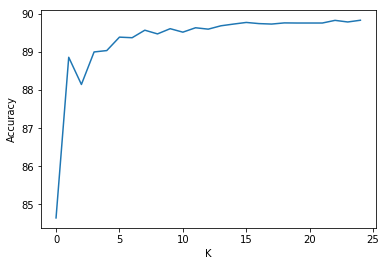

In [35]:
# Find the optimal K for KNN 

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_x, y, test_size = 0.2, random_state = 123)

neighbors = np.arange(0,25)
cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print(k_value, scores.mean())
optimal_k = neighbors[cv_scores.index(max(cv_scores))]

plt.plot(neighbors, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [36]:
print(optimal_k)

24


In [37]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

Training_score_knn = knn.score(X_train,y_train)
Accuracy_knn = accuracy_score(y_test, knnpred)
Precision_knn = precision_score(y_test, knnpred)
Recall_knn = recall_score(y_test, knnpred)
KNN_CV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, knnpred))
print("Training_score:", Training_score_knn)
print("Accuracy:", Accuracy_knn)
print("Precision:", Precision_knn)
print("Recall:", Recall_knn)
print("Cross Validation Score:", KNN_CV)

[[7182  116]
 [ 721  219]]
Training_score: 0.9018209408194233
Accuracy: 0.8983976693372178
Precision: 0.6537313432835821
Recall: 0.23297872340425532
Cross Validation Score: 0.8979362670713202


In [38]:
# SVM Classification

from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)

Training_score_svc = svc.score(X_train,y_train)
Accuracy_svc = accuracy_score(y_test, svcpred)
Precision_svc = precision_score(y_test, svcpred)
Recall_svc = recall_score(y_test, svcpred)
svc_CV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, svcpred))
print("Training_score:", Training_score_svc)
print("Accuracy:", Accuracy_svc)
print("Precision:", Precision_svc)
print("Recall:", Recall_svc)
print("Cross Validation Score:", svc_CV)

[[7298    0]
 [ 940    0]]
Training_score: 0.8877086494688923
Accuracy: 0.8858946346200534
Precision: 0.0
Recall: 0.0
Cross Validation Score: 0.8877086494688923


In [39]:
# Kernel SVM Classification

#from sklearn.svm import SVC
#ksvc = SVC(kernel = 'rbf', random_state = 0)
#ksvc.fit(X_train, y_train)
#ksvcpred = ksvc.predict(X_test)

#Training_score_ksvc = ksvc.score(X_train,y_train)
#Accuracy_ksvc = accuracy_score(y_test, ksvcpred)
#Precision_ksvc = precision_score(y_test, ksvcpred)
#Recall_ksvc = recall_score(y_test, ksvcpred)
#ksvc_CV = (cross_val_score(ksvc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

#print(confusion_matrix(y_test, ksvcpred))
#print("Training_score:", Training_score_ksvc)
#print("Accuracy:", Accuracy_ksvc)
#print("Precision:", Precision_ksvc)
#print("Recall:", Recall_ksvc)
#print("Cross Validation Score:", ksvc_CV)

In [40]:
# Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
nbc= GaussianNB()
nbc.fit(X_train, y_train)
nbcpred = nbc.predict(X_test)
probs = nbc.predict(X_test)

Training_score_nbc = nbc.score(X_train,y_train)
Accuracy_nbc = accuracy_score(y_test, nbcpred)
Precision_nbc = precision_score(y_test, nbcpred)
Recall_nbc = recall_score(y_test, nbcpred)
nbc_CV = (cross_val_score(nbc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, nbcpred))
print("Training_score:", Training_score_nbc)
print("Accuracy:", Accuracy_nbc)
print("Precision:", Precision_nbc)
print("Recall:", Recall_nbc)
print("Cross Validation Score:", nbc_CV)

[[6411  887]
 [ 479  461]]
Training_score: 0.8333839150227618
Accuracy: 0.8341830541393542
Precision: 0.34198813056379823
Recall: 0.49042553191489363
Cross Validation Score: 0.83350531107739


In [41]:
# Artificial Neural Network

#import sys
#print(sys.base_prefix)
#import pip
#pip.main(['install', 'keras'])

#import keras
#from keras.models import Sequential
#from keras.layers import Dense

# Initialising the ANN
#ANN = Sequential()

# Adding the input layer and the first hidden layer
#ANN.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
#ANN.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
#ANN.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
#ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
#ANN.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
#ANNpred = ANN.predict(X_test)
#ANNpred = (ANNpred > 0.5)

#Training_score_ANN = ANN.score(X_train,y_train)
#Accuracy_ANN = accuracy_score(y_test, ANNpred)
#Precision_ANN = precision_score(y_test, ANNpred)
#Recall_ANN = recall_score(y_test, ANNpred)
#ANN_CV = (cross_val_score(ANN, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

#print(confusion_matrix(y_test, ANNpred))
#print("Training_score:", Training_score_ANN)
#print("Accuracy:", Accuracy_ANN)
#print("Precision:", Precision_ANN)
#print("Recall:", Recall_ANN)
#print("Cross Validation Score:", ANN_CV)

In [42]:
# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dt.fit(X_train, y_train)
dtpred = dt.predict(X_test)

Training_score_dt = dt.score(X_train,y_train)
Accuracy_dt = accuracy_score(y_test, dtpred)
Precision_dt = precision_score(y_test, dtpred)
Recall_dt = recall_score(y_test, dtpred)
dt_CV = (cross_val_score(dt, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, dtpred))
print("Training_score:", Training_score_dt)
print("Accuracy:", Accuracy_dt)
print("Precision:", Precision_dt)
print("Recall:", Recall_dt)
print("Cross Validation Score:", dt_CV)

[[6619  679]
 [ 596  344]]
Training_score: 0.9886798179059181
Accuracy: 0.8452294246176256
Precision: 0.3362658846529814
Recall: 0.3659574468085106
Cross Validation Score: 0.8430349013657057


In [43]:
#f1 = 2*Precision_dt*Recall_dt/(Precision_dt+Recall_dt)
#print(f1)

In [44]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

Training_score_rfc = rfc.score(X_train,y_train)
Accuracy_rfc = accuracy_score(y_test, rfcpred)
Precision_rfc = precision_score(y_test, rfcpred)
Recall_rfc = recall_score(y_test, rfcpred)
rfc_CV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, rfcpred))
print("Training_score:", Training_score_rfc)
print("Accuracy:", Accuracy_rfc)
print("Precision:", Precision_rfc)
print("Recall:", Recall_rfc)
print("Cross Validation Score:", rfc_CV)

[[7047  251]
 [ 634  306]]
Training_score: 0.9886798179059181
Accuracy: 0.892571012381646
Precision: 0.5493716337522442
Recall: 0.32553191489361705
Cross Validation Score: 0.8896206373292868


In [45]:
#Gradient Boost Classification

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbcpred = gbc.predict(X_test)

Training_score_gbc = gbc.score(X_train,y_train)
Accuracy_gbc = accuracy_score(y_test, gbcpred)
Precision_gbc = precision_score(y_test, gbcpred)
Recall_gbc = recall_score(y_test, gbcpred)
gbc_CV = (cross_val_score(gbc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, gbcpred))
print("Training_score:", Training_score_gbc)
print("Accuracy:", Accuracy_gbc)
print("Precision:", Precision_gbc)
print("Recall:", Recall_gbc)
print("Cross Validation Score:", gbc_CV)

[[7171  127]
 [ 687  253]]
Training_score: 0.9046433990895296
Accuracy: 0.9011896091284293
Precision: 0.6657894736842105
Recall: 0.2691489361702128
Cross Validation Score: 0.9008801213960547


In [46]:
#XG Boost Classification

#import sys
#print(sys.base_prefix)
#import pip
#pip.main(['install', 'xgboost'])

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbpred = xgb.predict(X_test)

Training_score_xgb = xgb.score(X_train,y_train)
Accuracy_xgb = accuracy_score(y_test, xgbpred)
Precision_xgb = precision_score(y_test, xgbpred)
Recall_xgb = recall_score(y_test, xgbpred)
xgb_CV = (cross_val_score(xgb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print(confusion_matrix(y_test, xgbpred))
print("Training_score:", Training_score_xgb)
print("Accuracy:", Accuracy_xgb)
print("Precision:", Precision_xgb)
print("Recall:", Recall_xgb)
print("Cross Validation Score:", xgb_CV)

[[7187  111]
 [ 690  250]]
Training_score: 0.9033383915022761
Accuracy: 0.9027676620538966
Precision: 0.6925207756232687
Recall: 0.26595744680851063
Cross Validation Score: 0.9006676783004552


In [47]:
Performance_Table= pd.DataFrame({
    'Training_Score':[Training_score_log,Training_score_knn,Training_score_svc, Training_score_nbc, Training_score_dt,Training_score_rfc, Training_score_gbc, Training_score_xgb]
    ,'Accuracy' : [Accuracy_log, Accuracy_knn, Accuracy_svc, Accuracy_nbc, Accuracy_dt, Accuracy_rfc, Accuracy_gbc, Accuracy_xgb]
    ,'Precision' : [Precision_log, Precision_knn, Precision_svc, Precision_nbc, Precision_dt, Precision_rfc, Precision_gbc, Precision_xgb]
    ,'Recall' : [Recall_log, Recall_knn, Recall_svc, Recall_nbc, Recall_dt, Recall_rfc, Recall_gbc, Recall_xgb]
    ,'Cross-Validation' : [log_CV, KNN_CV, svc_CV, nbc_CV, dt_CV, rfc_CV, gbc_CV, xgb_CV]}
,index=['Logistic Regression','K-NN','SVM','NaiveBayes','Decision Tree','Random Forest','GradientBoost','XGBoost'])

Performance_Table.sort_values(by='Cross-Validation', ascending=False)


,Accuracy,Cross-Validation,Precision,Recall,Training_Score
GradientBoost,0.901190,0.900880,0.665789,0.269149,0.904643
XGBoost,0.902768,0.900668,0.692521,0.265957,0.903338
Logistic Regression,0.900583,0.899211,0.710801,0.217021,0.900182
K-NN,0.898398,0.897936,0.653731,0.232979,0.901821
Random Forest,0.892571,0.889621,0.549372,0.325532,0.988680
SVM,0.885895,0.887709,0.000000,0.000000,0.887709
Decision Tree,0.845229,0.843035,0.336266,0.365957,0.988680
NaiveBayes,0.834183,0.833505,0.341988,0.490426,0.833384


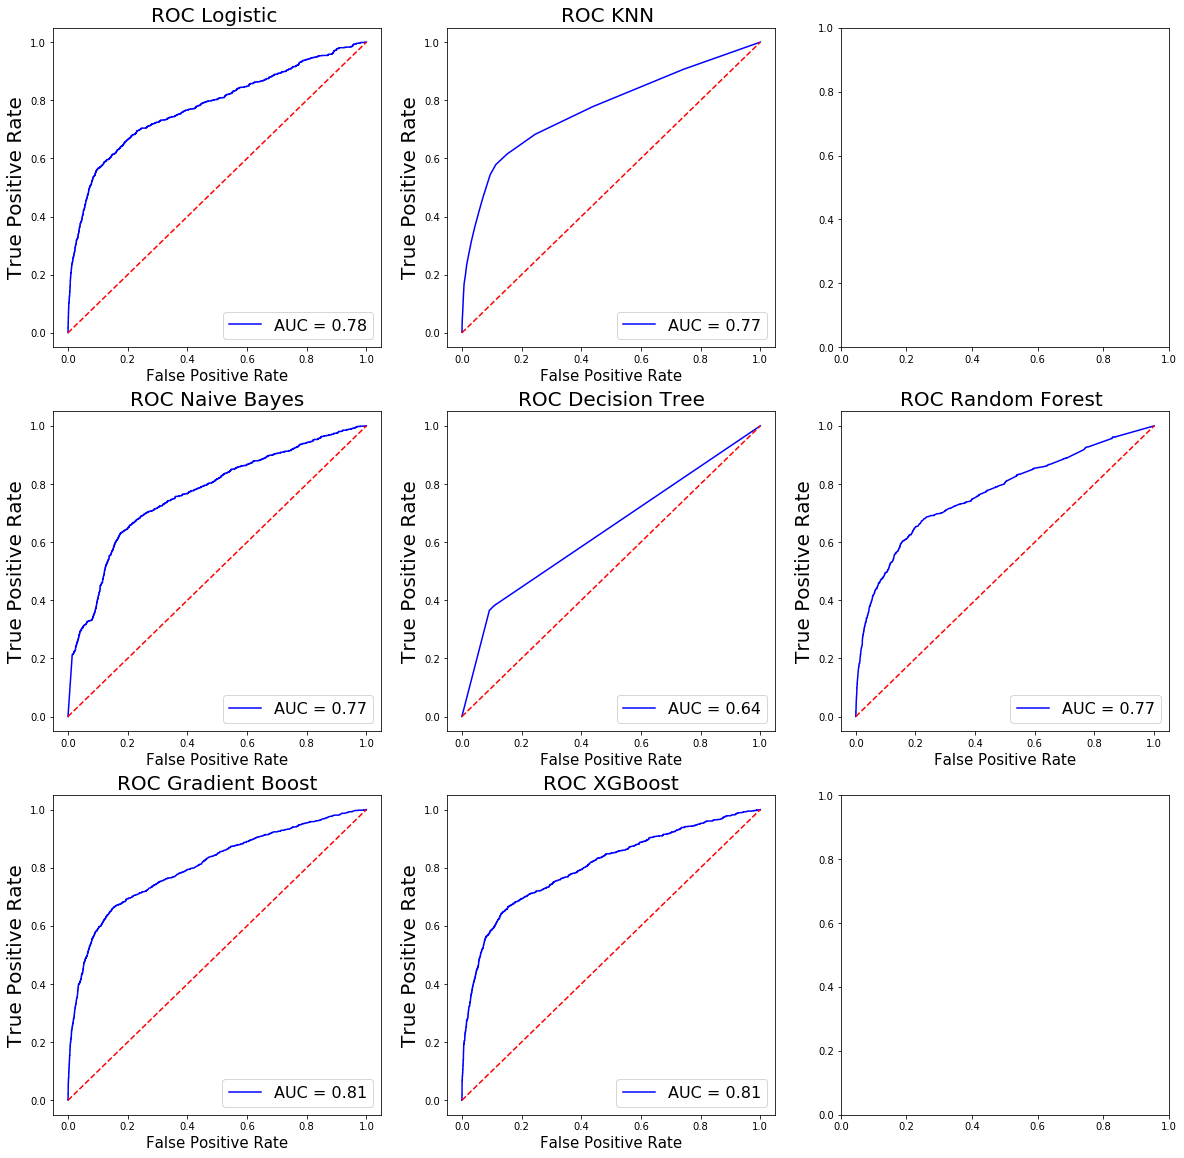

In [48]:
from sklearn import metrics

fig, ax_arr = plt.subplots(nrows = 3, ncols = 3, figsize = (20,20))

#Logistic Regresion
probs = log.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#KNN
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,1].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC KNN ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#Naive Bayes
probs = nbc.predict_proba(X_test)
preds = probs[:,1]
fprnbc, tprnbc, thresholdnbc = metrics.roc_curve(y_test, preds)
roc_aucnbc = metrics.auc(fprnbc, tprnbc)

ax_arr[1,0].plot(fprnbc, tprnbc, 'b', label = 'AUC = %0.2f' % roc_aucnbc)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Naive Bayes',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fprdt, tprdt, thresholddt = metrics.roc_curve(y_test, preds)
roc_aucdt = metrics.auc(fprdt, tprdt)

ax_arr[1,1].plot(fprdt, tprdt, 'b', label = 'AUC = %0.2f' % roc_aucdt)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC Decision Tree',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('ROC Random Forest ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})


#Gradient Boost 
probs = gbc.predict_proba(X_test)
preds = probs[:,1]
fprgbc, tprgbc, thresholdgbc = metrics.roc_curve(y_test, preds)
roc_aucgbc = metrics.auc(fprgbc, tprgbc)

ax_arr[2,0].plot(fprgbc, tprgbc, 'b', label = 'AUC = %0.2f' % roc_aucgbc)
ax_arr[2,0].plot([0, 1], [0, 1],'r--')
ax_arr[2,0].set_title('ROC Gradient Boost',fontsize=20)
ax_arr[2,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,0].legend(loc = 'lower right', prop={'size': 16})


#XGBoost 
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[2,1].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[2,1].plot([0, 1], [0, 1],'r--')
ax_arr[2,1].set_title('ROC XGBoost',fontsize=20)
ax_arr[2,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2,1].legend(loc = 'lower right', prop={'size': 16})


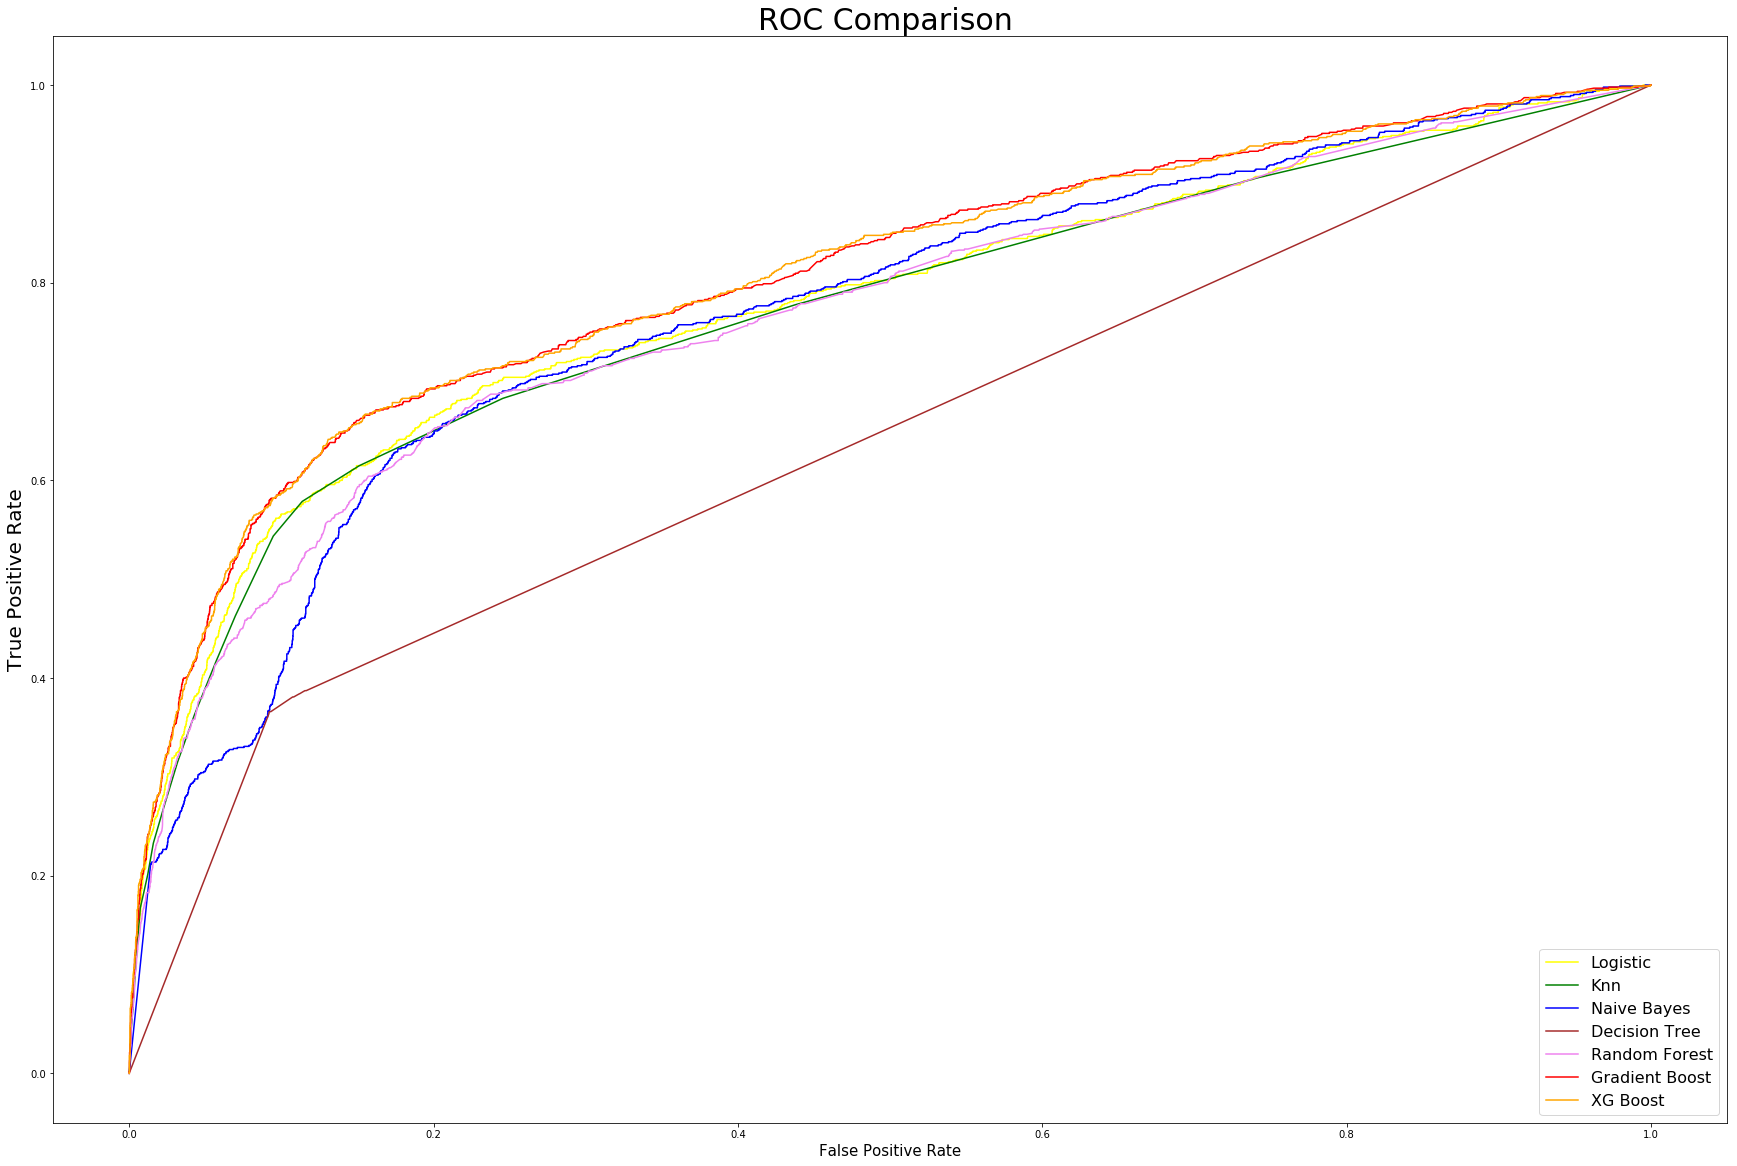

In [49]:
#Comparison of ROCs
fig, (ax) = plt.subplots(nrows = 1, ncols = 1,figsize = (30,20))

ax.plot(fprlog, tprlog, 'b', label = 'Logistic', color='yellow')
ax.plot(fprknn, tprknn, 'b', label = 'Knn', color='green')
ax.plot(fprnbc, tprnbc, 'b', label = 'Naive Bayes', color='blue')
ax.plot(fprdt, tprdt, 'b', label = 'Decision Tree', color='brown')
ax.plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='violet')
ax.plot(fprgbc, tprgbc, 'b', label = 'Gradient Boost', color='red')
ax.plot(fprxgb, tprxgb, 'b', label = 'XG Boost', color='orange')

ax.set_title('ROC Comparison ',fontsize=30)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})


In [50]:
# Picked champion Model is Gradient Boost

# Optimizing the Model using Hyperparameter Tuning

In [51]:
# Next Step is to Tune the Model

In [52]:
bank['OUTPUT_LABEL'] = (bank.y == 'yes').astype('int')

In [53]:
#bank['OUTPUT_LABEL']

In [54]:
#Split in to three data sets: Training 70%, validation 15%, Test 15%
df_valid_test=bank.sample(frac=0.30,random_state=22)
df_test = df_valid_test.sample(frac = 0.5, random_state = 22)
df_valid = df_valid_test.drop(df_test.index)
df_train = bank.drop(df_valid_test.index)

In [55]:
# create the X and y matrices

cols_input = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']

X_train = df_train[cols_input].values
X_test = df_test[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

#print('Training:',X_train.shape)
#print('Testing:',X_test.shape, y_train.shape)
#print('Validation:',X_valid.shape, y_valid.shape)

In [56]:
# Handling Missing Values Function
#def fill_my_missing(df, df_mean, col2use):
    # check the columns are present
    #for c in col2use:
        #assert c in df.columns, c + ' not in df'
        #assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    #for c in col2use:
        #mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        #df[c] = df[c].fillna(mean_value)
    #return df

#df_mean = df_train_all[cols_input].mean(axis = 0)
#df_mean.head()

In [57]:
# Scaling and transforming the data

from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train)

X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [58]:
# Optimizing the Gradient Boost model by Hyperparameter tuning

from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)
import time

n_estimators = range(50,200,50)
max_depth = range(1,5,1)
learning_rate = [0.001,0.01,0.1]
random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

gbc_random.best_params_

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)


31.85046124458313


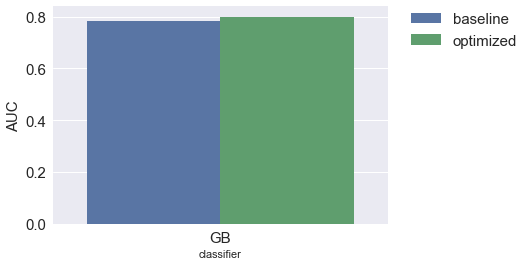

        auc classifier   data_set
0  0.784858         GB   baseline
1  0.799488         GB  optimized


In [60]:
# Plot to compare the Optimized Model
import seaborn as sns
import matplotlib.pyplot as plt

df_results = pd.DataFrame({'classifier':['GB','GB'],
                           'data_set':['baseline','optimized'],
                          'auc':[gbc_valid_opt_auc, gbc_valid_base_auc],
                          })

sns.set(style="darkgrid")
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

print(df_results)


# Evaluating the Champion Model: Gradient Boost

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)
best_model = pickle.load(open('best_classifier.pkl','rb'))

y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

#prob prediction
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [69]:
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    
    print(' ')
    return auc, accuracy 

def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

thresh = .5

print('Training:')
train_auc, train_accuracy = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.771
accuracy:0.889
 
Validation:
AUC:0.785
accuracy:0.886
 
Test:
AUC:0.772
accuracy:0.882
 


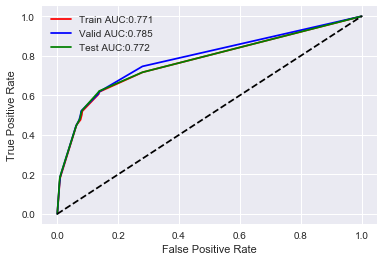

In [63]:
# ROC
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Feature Importance

In [64]:
gbc=best_model
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [65]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.762625
pdays,0.086291
cons.conf.idx,0.061452
poutcome,0.060195
month,0.013566


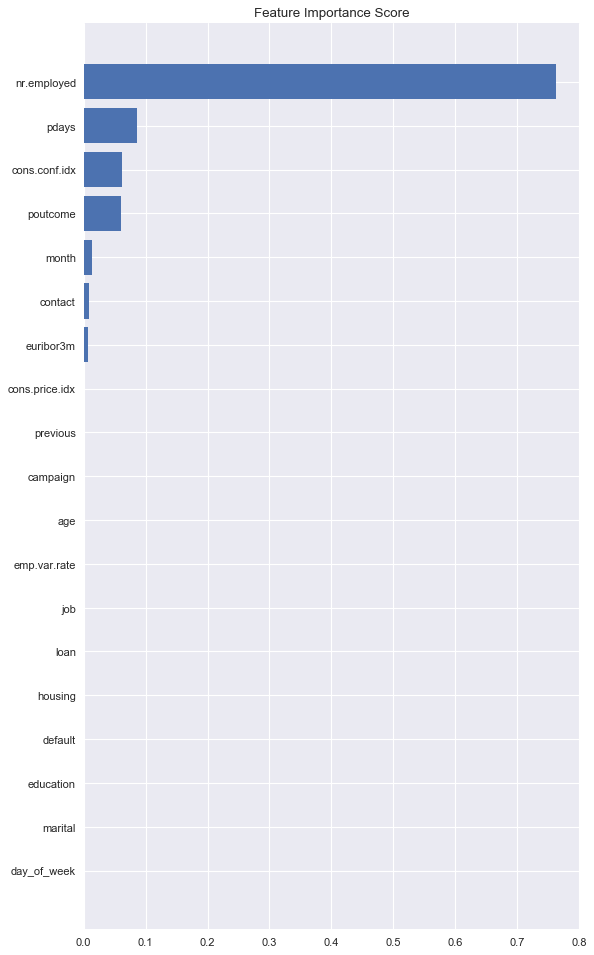

In [66]:
#plotting the Features

num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.title('Feature Importance Score')
plt.yticks(ylocs, feature_labels)
plt.show()